## AMBUJ GUPTA 

## CAST BLASTING PERFORMANCE PREDICTION USING RFR

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("./Cast_Blasting_data.csv")

In [3]:
df

,Height to width ratio (H/W),Length to width ratio (L/W),Height to burden ratio (H/b),Effective in-hole explosive density (te/m3),Powder factor (m3/kg),Average delay per metre width of burden (ms/m),Cast percentage (%)
0,0.65,2.32,4.99,0.86,1.46,12.91,34.54
1,0.66,2.41,4.99,0.85,1.46,12.91,35.82
2,0.61,4.33,4.60,0.91,1.50,9.13,16.97
3,0.61,4.33,4.60,0.84,1.50,9.13,18.40
4,0.61,4.33,4.60,0.84,1.50,9.13,21.22
...,...,...,...,...,...,...,...
63,0.61,4.33,4.60,0.84,1.50,9.13,18.56
64,0.61,4.33,4.60,0.84,1.50,9.13,21.30
65,0.61,4.33,4.60,0.83,1.50,9.13,21.43
66,0.61,4.33,4.60,0.84,1.50,9.13,18.22


# DESCRIPTIVE STATISTICS

In [4]:
df.describe()

,Height to width ratio (H/W),Length to width ratio (L/W),Height to burden ratio (H/b),Effective in-hole explosive density (te/m3),Powder factor (m3/kg),Average delay per metre width of burden (ms/m),Cast percentage (%)
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.637941,2.782206,4.816176,0.848529,1.502353,12.545882,28.454265
std,0.038228,1.257455,0.153312,0.038605,0.078572,2.219281,6.362179
min,0.580000,0.780000,4.600000,0.780000,1.320000,9.130000,16.970000
25%,0.610000,2.210000,4.650000,0.820000,1.470000,12.270000,23.322500
50%,0.635000,2.600000,4.800000,0.850000,1.500000,12.910000,29.575000
75%,0.650000,4.330000,5.000000,0.872500,1.500000,13.090000,33.860000
max,0.820000,6.140000,5.020000,0.920000,1.730000,16.190000,40.600000


* The results of the descriptive statistics showed that the mean cast percentage was 28.45 ± 6.36%. The minimum and maximum values of cast percentage were 16.97% and 40.6% respectively. 
* The cast percentage contained no outliers as none of the points fell beyond the interval [Q1-1.5*IQR, Q3 + 1.5*IQR], i.e. [14.45,43.45]. 

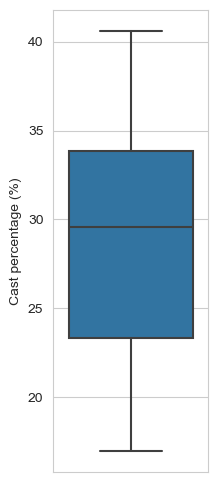

In [5]:
fig = plt.figure(figsize=(2,6))
sns.boxplot(y=df['Cast percentage (%)'],data=df['Cast percentage (%)'])
plt.show()

* It was observed that the median of the output variable (cast percentage) was close to 30%.

(array([ 0.,  8., 13., 13., 23.,  9.,  2.,  0.]),
 array([ 0, 15, 20, 25, 30, 35, 40, 45, 50]),
 <BarContainer object of 8 artists>)

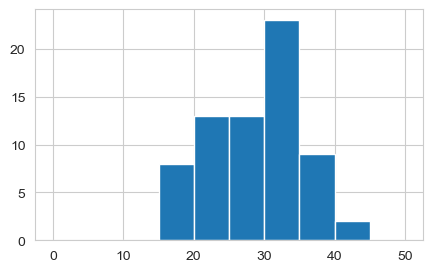

In [6]:
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(df['Cast percentage (%)'], bins = [0, 15, 20, 25,30,35,40,45,50])

Histogram plot of the cast percentage is presented and exhibits that most of the values were concentrated in the range of 25% to 35%. 

**SUMMARY OF THE DATASET**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Height to width ratio (H/W)                     68 non-null     float64
 1   Length to width ratio (L/W)                     68 non-null     float64
 2   Height to burden ratio (H/b)                    68 non-null     float64
 3   Effective in-hole explosive density (te/m3)     68 non-null     float64
 4   Powder factor (m3/kg)                           68 non-null     float64
 5   Average delay per metre width of burden (ms/m)  68 non-null     float64
 6   Cast percentage (%)                             68 non-null     float64
dtypes: float64(7)
memory usage: 3.8 KB


**HISTPLOT FOR ALL THE VARIABLES**

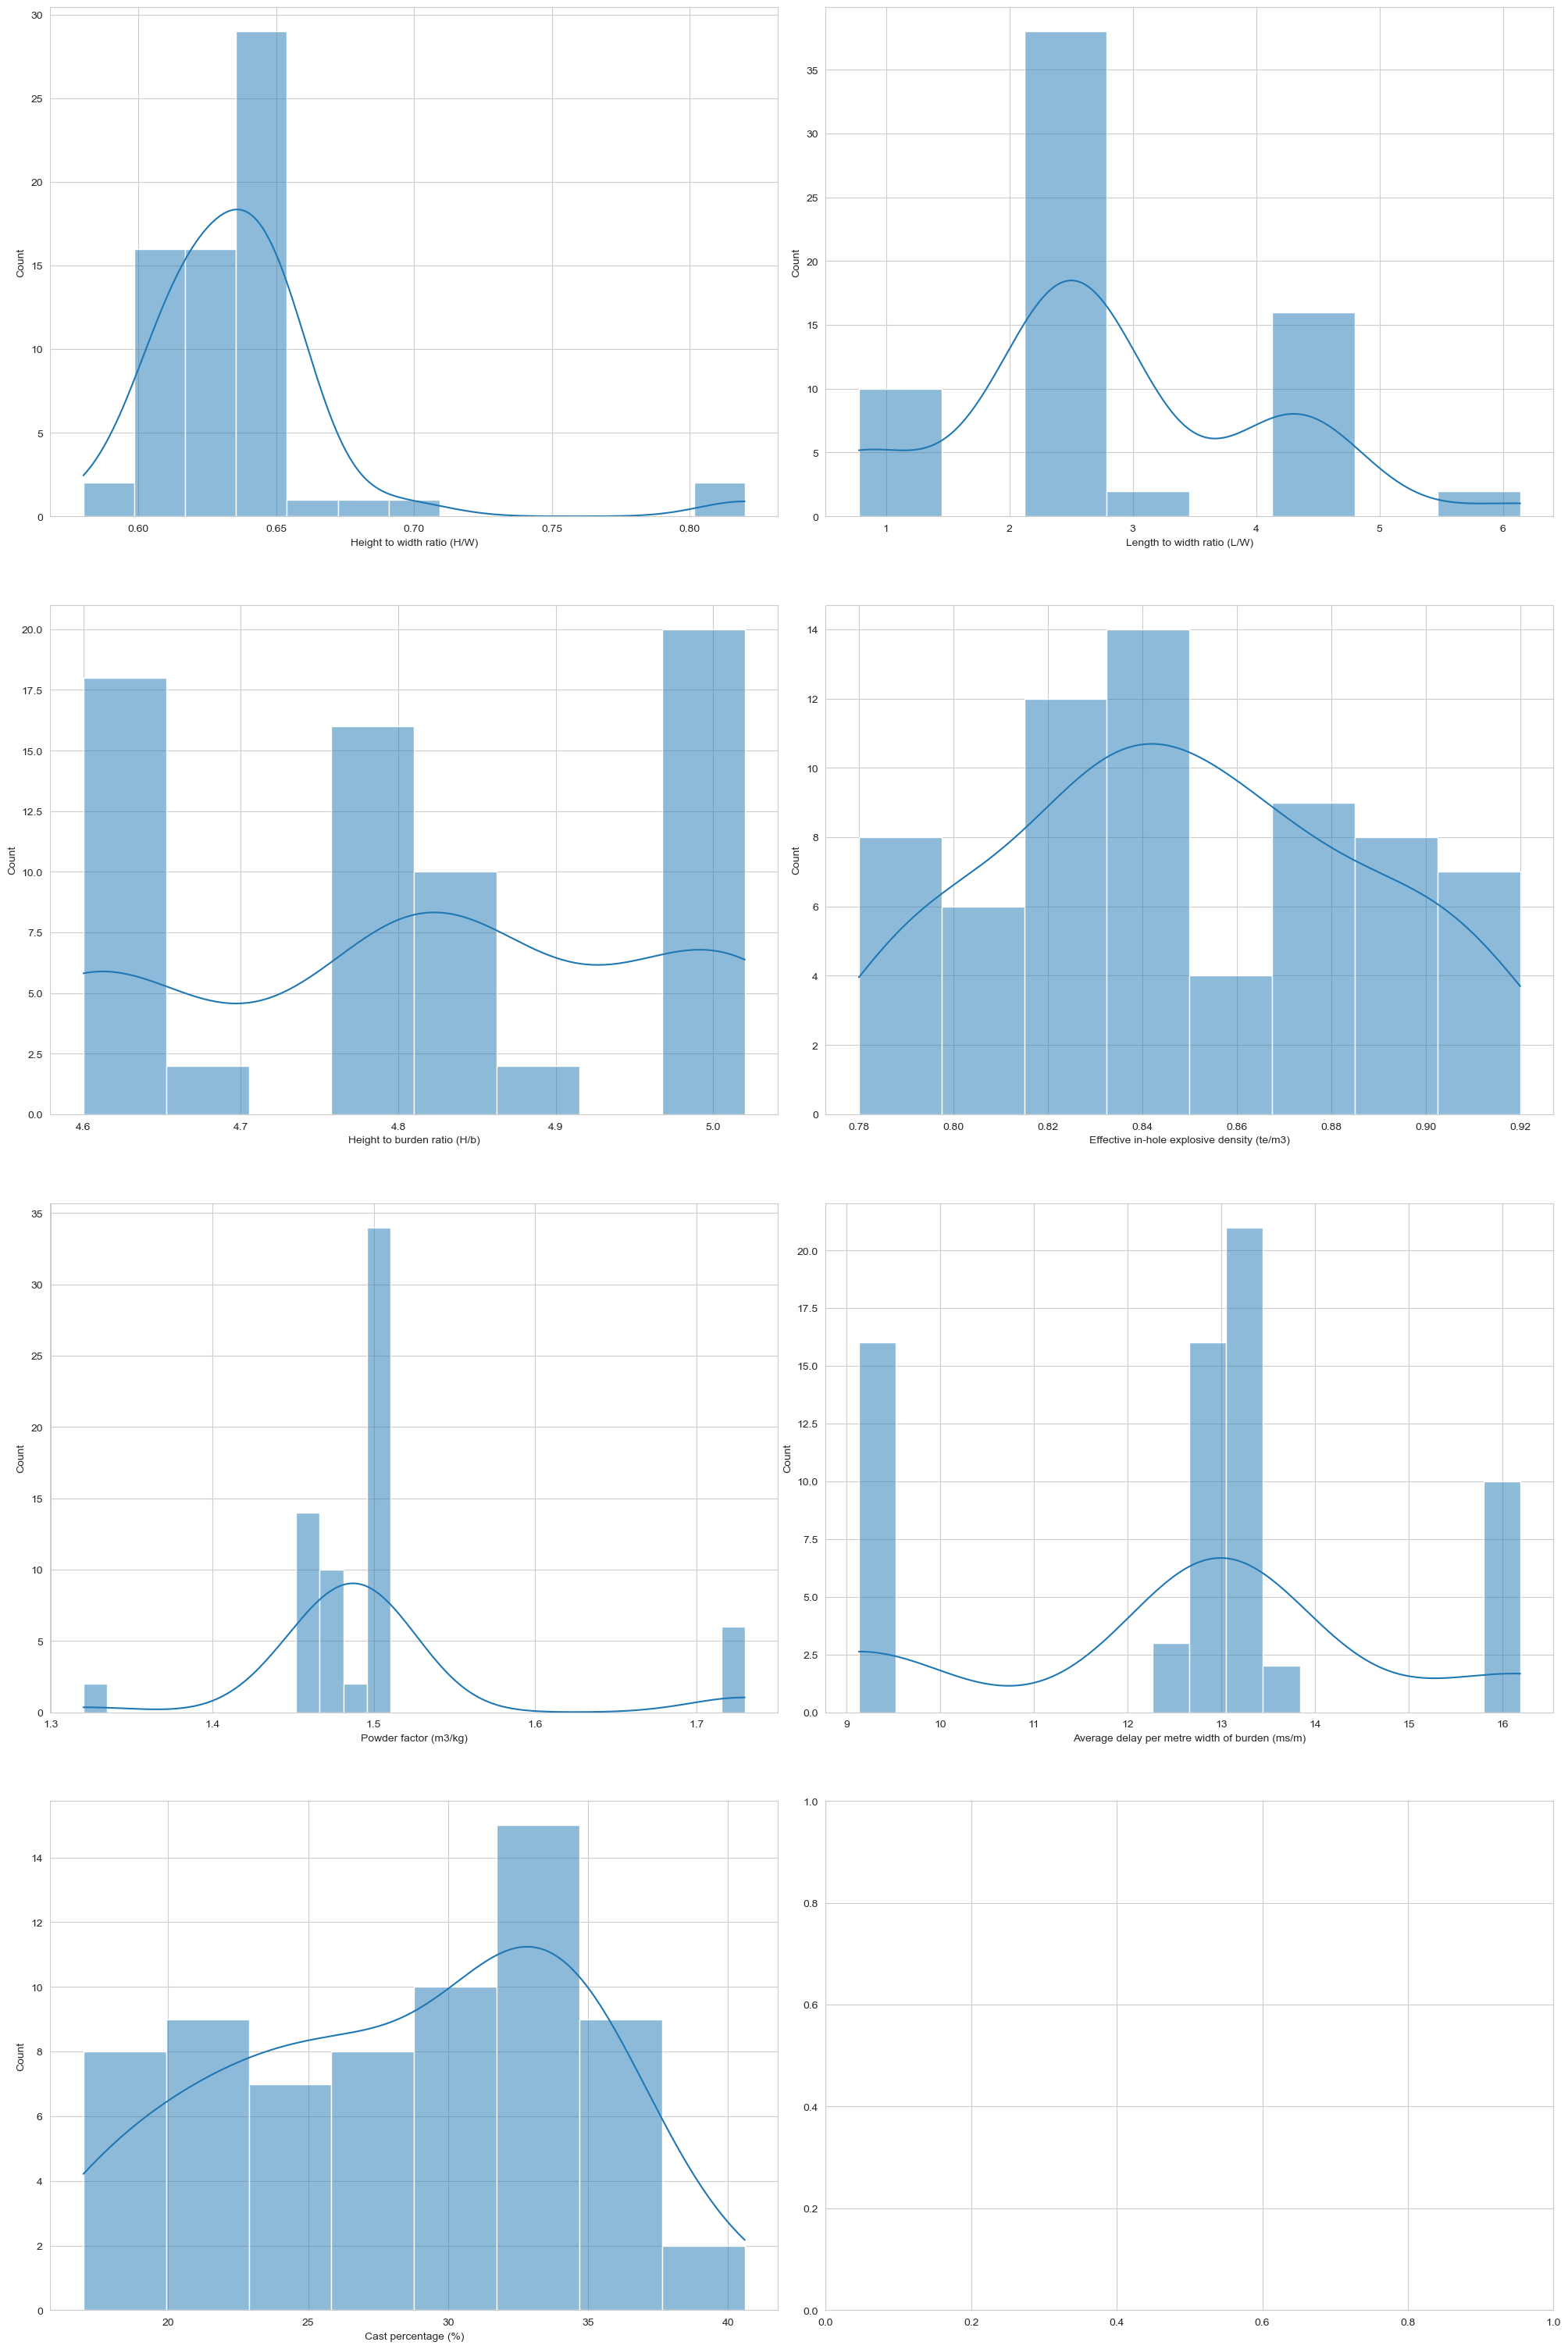

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 30))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# PAIRWISE CORRELATION 

<AxesSubplot:>

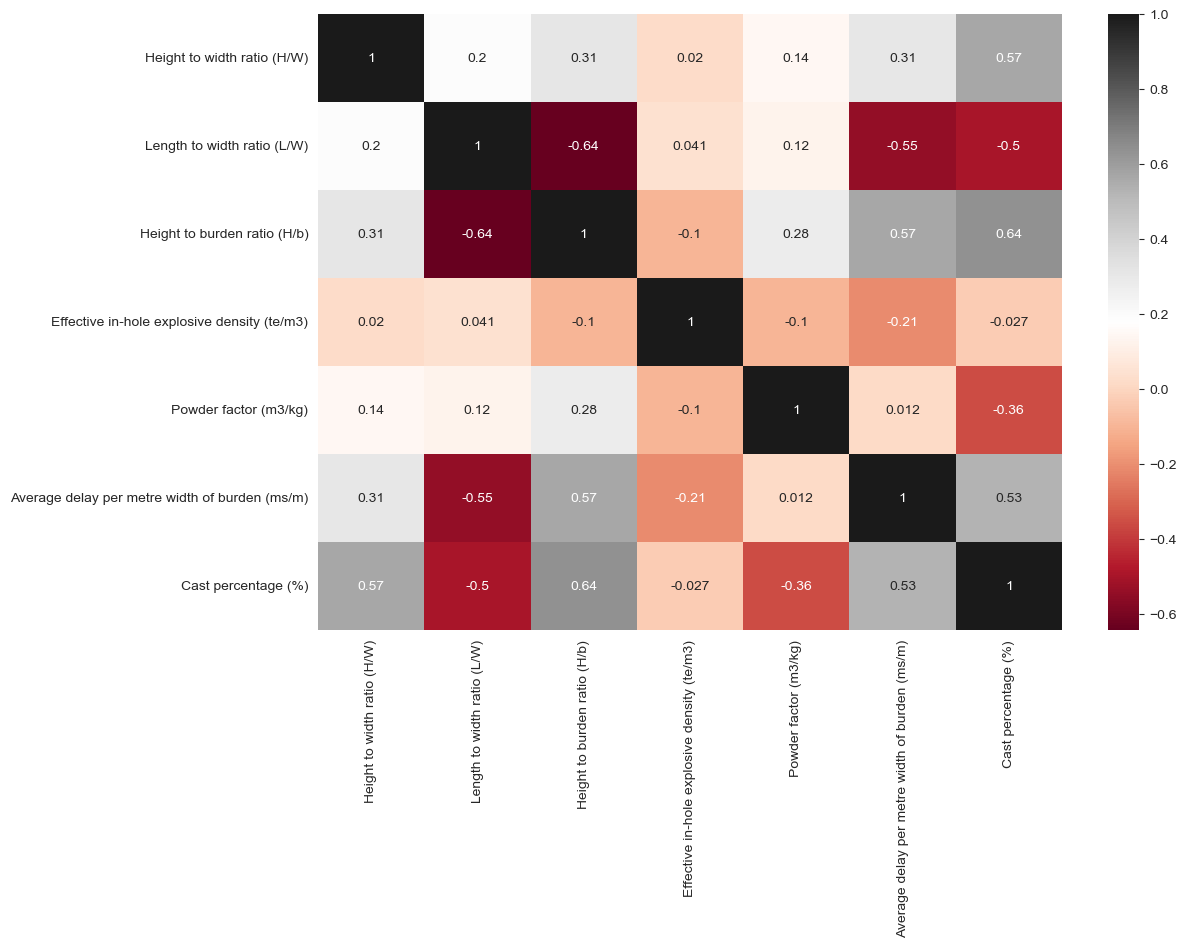

In [9]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy', annot=True)

<AxesSubplot:xlabel='Cast percentage (%)', ylabel='Height to width ratio (H/W)'>

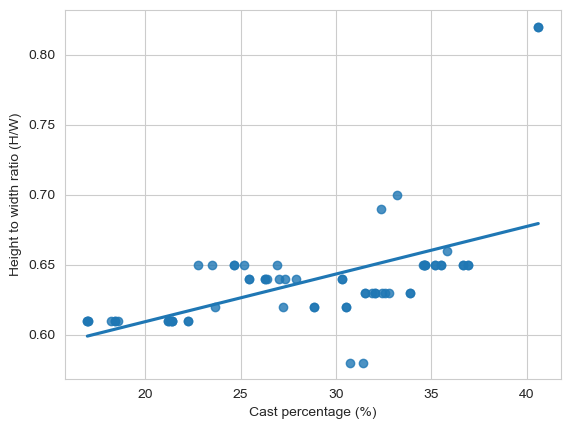

In [10]:
sns.regplot(x = "Cast percentage (%)",
            y = "Height to width ratio (H/W)", 
            ci = None,
            data = df)

<AxesSubplot:xlabel='Cast percentage (%)', ylabel='Height to burden ratio (H/b)'>

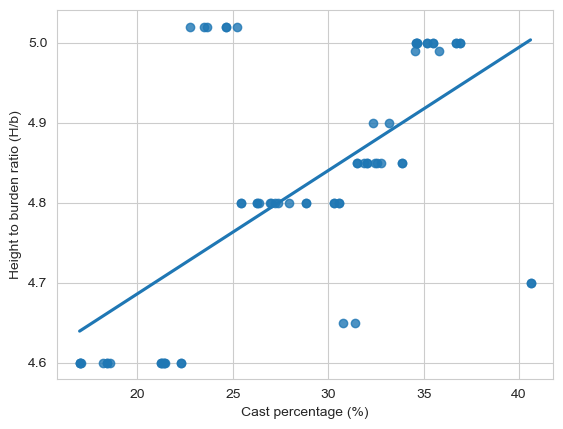

In [11]:
sns.regplot(x = "Cast percentage (%)",
            y = "Height to burden ratio (H/b)", 
            ci = None,
            data = df)

**PAIRPLOT OF INPUT VARIABLES**

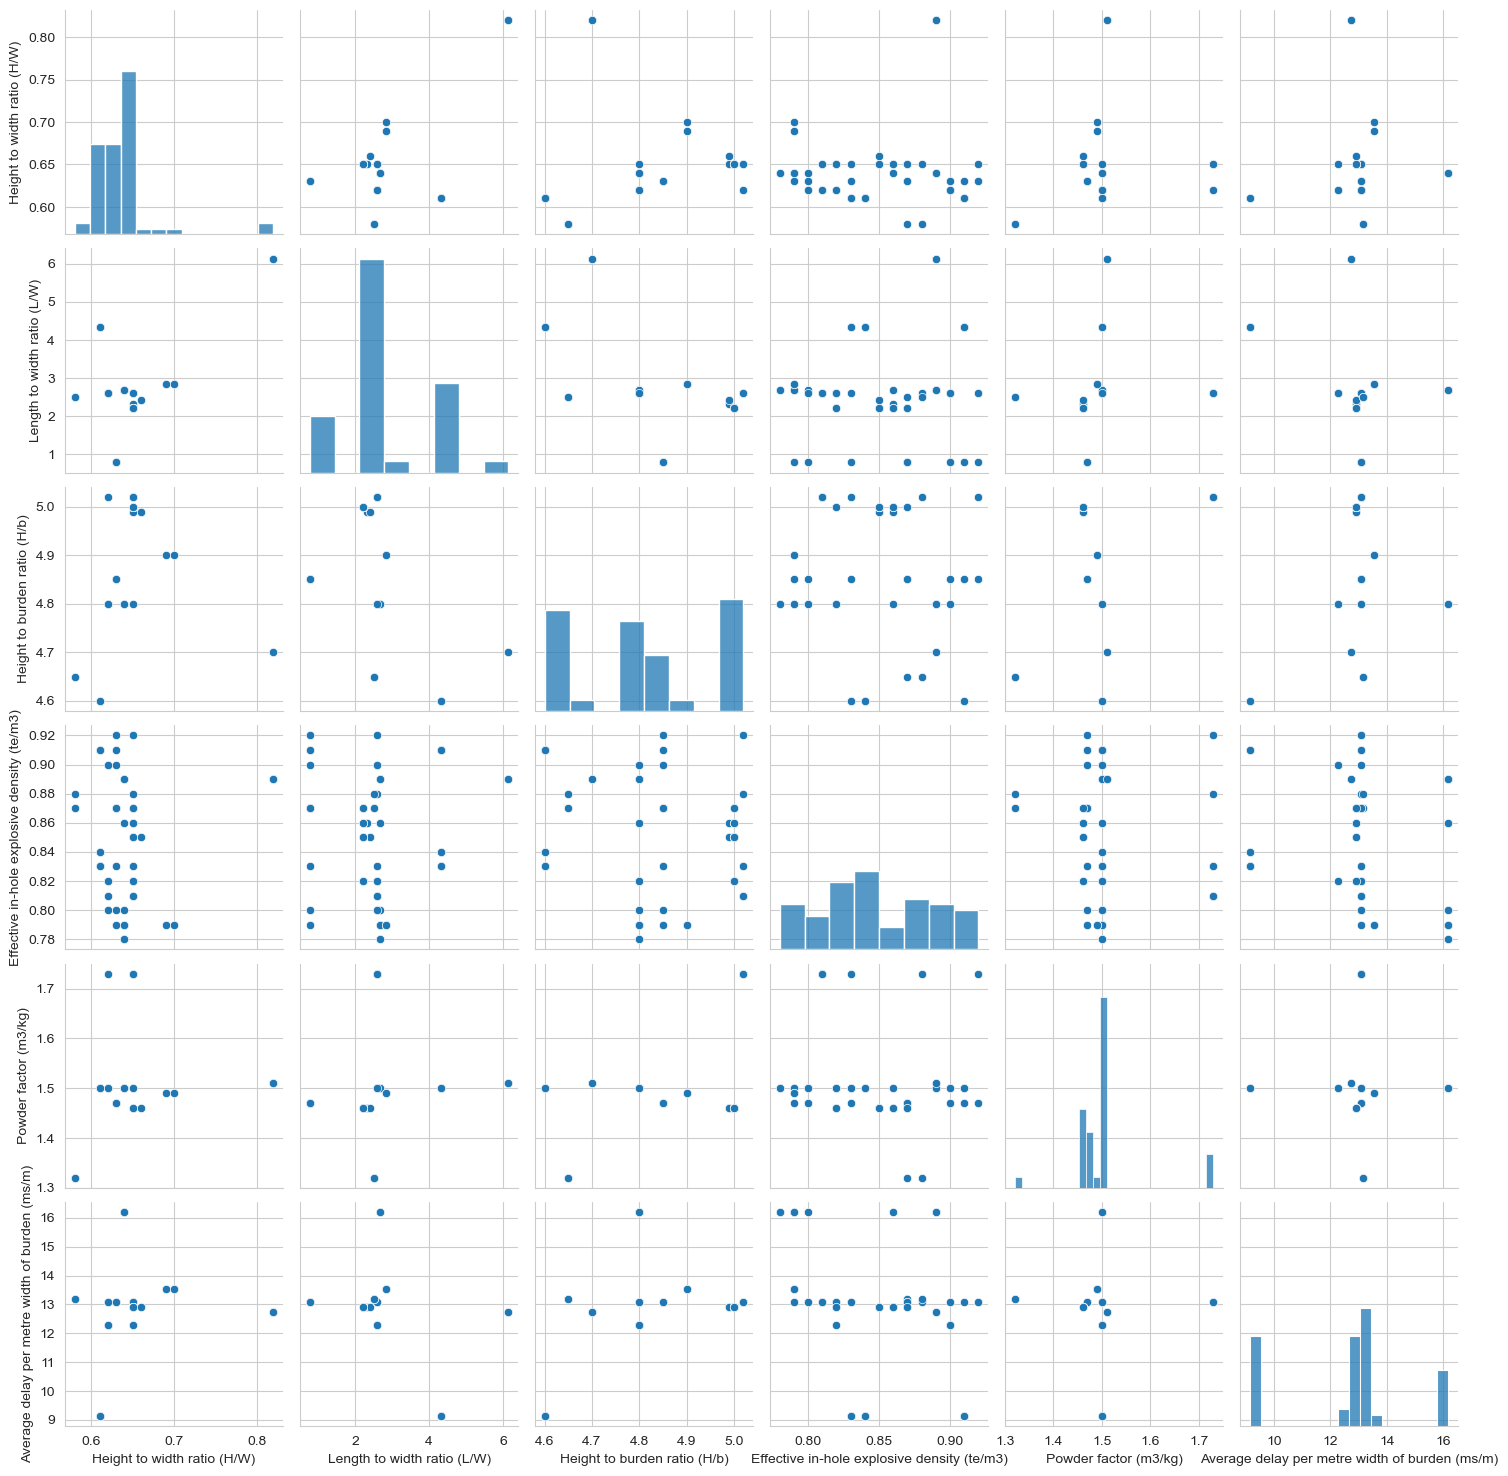

In [12]:
df1 = df.drop(['Cast percentage (%)'], axis = 1)
sns.pairplot(df1)

# SPLITTING THE DATASET

In [13]:
X = df.drop(['Cast percentage (%)'], axis = 1)
y = df['Cast percentage (%)']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* Used 20% data for testing and 80% for training

**INFO ABOUT TEST TRAIN SPLIT**

In [15]:
print("X_train")
print(X_train.count(),'\n')

print('X_test')
print(X_test.count(), '\n')

print("y_train")
print(y_train.count(),'\n')

print('y_test')
print(y_test.count(), '\n')

X_train
Height to width ratio (H/W)                       54
Length to width ratio (L/W)                       54
Height to burden ratio (H/b)                      54
Effective in-hole explosive density (te/m3)       54
Powder factor (m3/kg)                             54
Average delay per metre width of burden (ms/m)    54
dtype: int64 

X_test
Height to width ratio (H/W)                       14
Length to width ratio (L/W)                       14
Height to burden ratio (H/b)                      14
Effective in-hole explosive density (te/m3)       14
Powder factor (m3/kg)                             14
Average delay per metre width of burden (ms/m)    14
dtype: int64 

y_train
54 

y_test
14 



  * A total of 54 data points were used for training and 14 for testing.

# DEVELOPMENT OF MLMODEL FOR CAST %

## Random Forest Regressor (RFR)

Data analysis suggested that a simple linear regression model would not be effective for prediction as a non-linear relationship between the input–and output dataset was observed.<br> 
The Deep learning approach was also not adopted due to the small size of the dataset (68 nos.). 

Thus, Non-parametric methods could be used as a viable alternative when the sample sizes were small, particularly when the sample size was less than 30 (Carolin et al. Citation2008).

**So, an ensemble tree-based algorithm, called the random forest regression (RFR) model, was used to predict the cast percentage. RFR is a tree-based algorithm comprising many decision trees (DTs)**

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
prediction = forest_model.predict(X_test)

In [18]:
mse1=mean_squared_error(prediction,y_test)
mae1=mean_absolute_error(prediction,y_test)

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.3985917396690613
MSE: 2.9036043236707836
RMSE: 1.7039965738436165


In [19]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df2

,Actual,Predicted
17,27.21,30.414600
29,36.68,35.468860
5,21.38,21.799742
24,33.86,32.650682
55,34.61,34.627400
59,36.68,35.468860
16,27.00,29.836400
0,34.54,34.744167
7,22.76,24.845600
13,26.29,27.781100


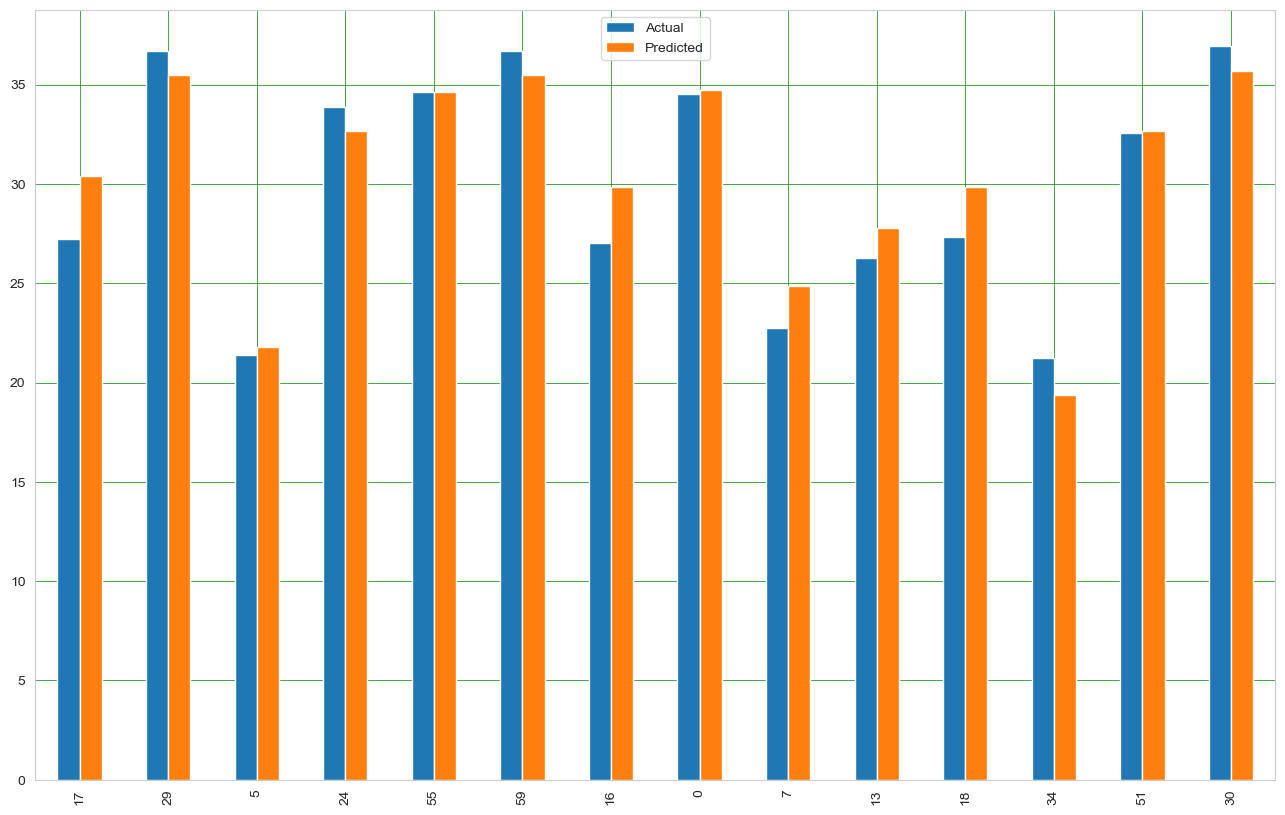

In [20]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Cross Validating the RFR with best params to avoid overfitting

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [22]:
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 10}

In [23]:
grid_search.best_score_

0.8819982062696946

In [24]:
predictions = grid_search.predict(X_test)

In [25]:
mse1=mean_squared_error(predictions,y_test)
mae1=mean_absolute_error(predictions,y_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6757214749536173
MSE: 4.040693411194479
RMSE: 2.010147609304968


In [26]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df4

,Actual,Predicted
17,27.21,30.156444
29,36.68,33.775067
5,21.38,21.322800
24,33.86,32.902022
55,34.61,35.698833
59,36.68,33.775067
16,27.00,28.508481
0,34.54,35.025000
7,22.76,26.642950
13,26.29,28.508481


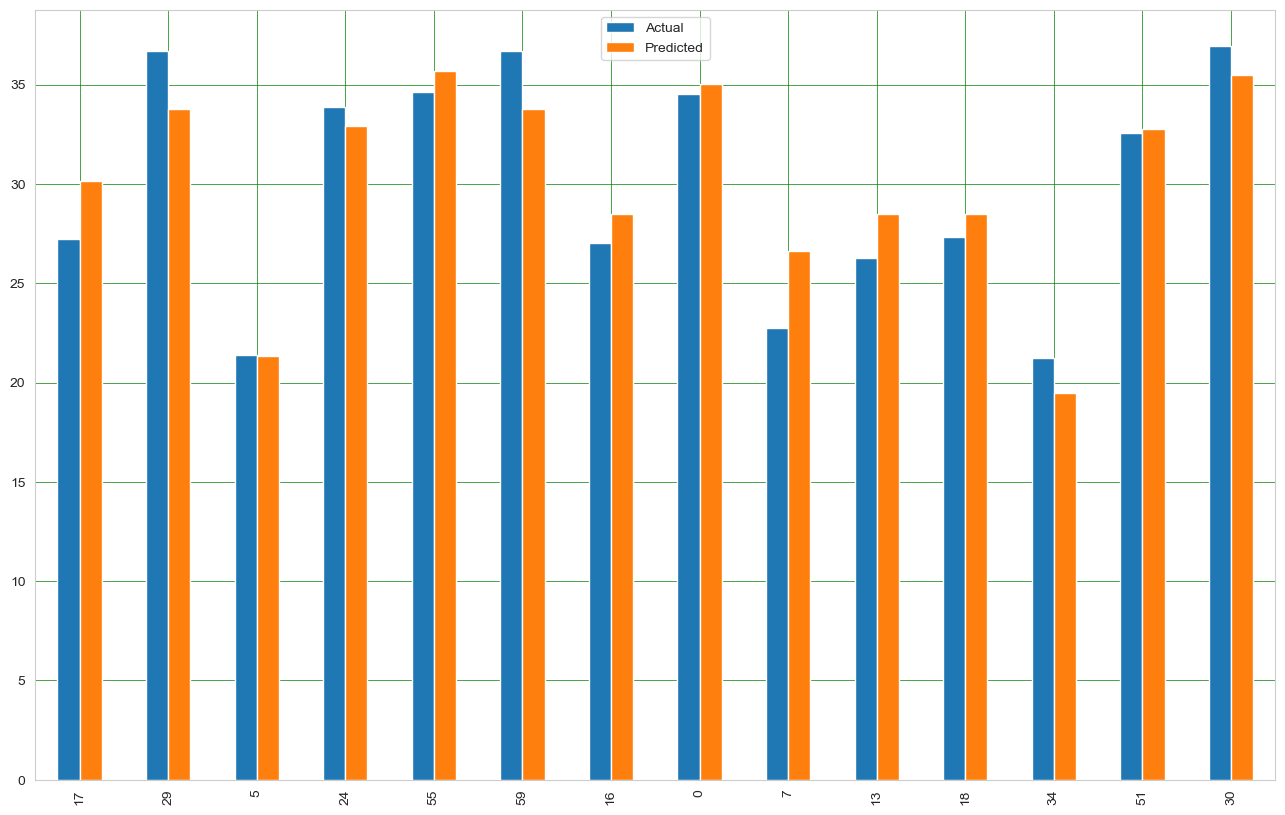

In [27]:
df4.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()